Epoch 1/400
25/25 [==============================] - 0s 6ms/step - loss: 0.0839 - mean_squared_error: 0.0839 - val_loss: 0.0773 - val_mean_squared_error: 0.0773
Epoch 2/400
25/25 [==============================] - 0s 2ms/step - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.0764 - val_mean_squared_error: 0.0764
Epoch 3/400
25/25 [==============================] - 0s 2ms/step - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.0760 - val_mean_squared_error: 0.0760
Epoch 4/400
25/25 [==============================] - 0s 2ms/step - loss: 0.0822 - mean_squared_error: 0.0822 - val_loss: 0.0759 - val_mean_squared_error: 0.0759
Epoch 5/400
25/25 [==============================] - 0s 2ms/step - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.0758 - val_mean_squared_error: 0.0758
Epoch 6/400
25/25 [==============================] - 0s 2ms/step - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.0757 - val_mean_squared_error: 0.0757
Epoch 7/400
25/25 [===============

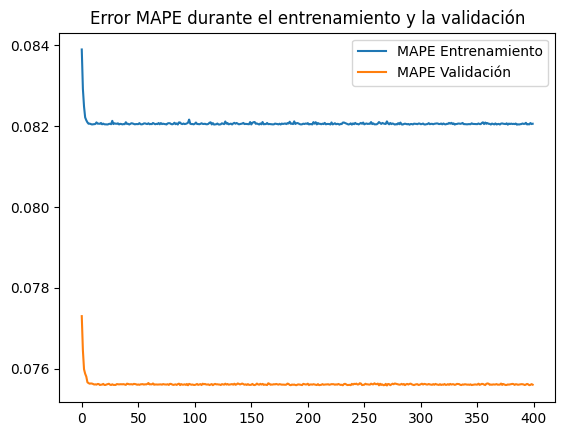

7/7 [==============================] - 0s 1ms/step


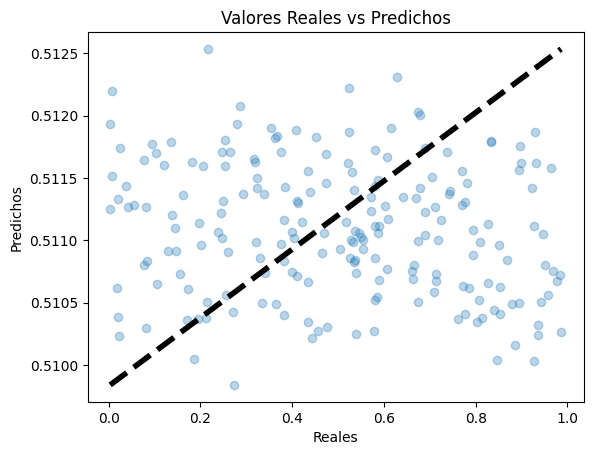

In [67]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import pandas as pd
import matplotlib.pyplot as plt


learning_rate = 0.01
momentum = 0.8

data_path = '../datasets/A1-synthetic-scaled.txt'
data = pd.read_csv(data_path, delimiter='\t', skiprows=1)
X = data.iloc[:, 1:].values  
y = data.iloc[:, 0].values  


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = keras.Sequential([
    Dense(9, activation='sigmoid', input_shape=(X_train.shape[1],)),    
    Dense(5, activation='tanh'),
    Dense(3, activation='sigmoid'),
    Dense(1, activation='tanh') 
])

optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
model.compile(optimizer=optimizer,
              loss='mse', 
              metrics=[tf.metrics.MeanSquaredError()])

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=400,
                    batch_size=32)

plt.plot(history.history['mean_squared_error'], label='MAPE Entrenamiento')
plt.plot(history.history['val_mean_squared_error'], label='MAPE Validación')
plt.title('Error MAPE durante el entrenamiento y la validación')
plt.legend()
plt.show()

predictions = model.predict(X_val)

plt.scatter(y_val, predictions, alpha=0.3)
plt.plot([y_val.min(), y_val.max()], [predictions.min(), predictions.max()], 'k--', lw=4)  # Linea de perfecta predicción
plt.title('Valores Reales vs Predichos')
plt.xlabel('Reales')
plt.ylabel('Predichos')
plt.show()
